In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [26]:
df = pd.read_excel('2015.xlsx')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [28]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [29]:
# Filter atribut yang akan digunakan
selected_features = ['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)']
df = df[selected_features]

# Pisahkan atribut penjelas (independent variables) dan variabel respon (dependent variable)
X = df[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)']]
y = df['Happiness Score']

In [30]:
# Analisis Deskriptif
print(df.describe())

       Happiness Score  Economy (GDP per Capita)      Family   
count       158.000000                158.000000  158.000000  \
mean          5.375734                  0.846137    0.991046   
std           1.145010                  0.403121    0.272369   
min           2.839000                  0.000000    0.000000   
25%           4.526000                  0.545808    0.856823   
50%           5.232500                  0.910245    1.029510   
75%           6.243750                  1.158448    1.214405   
max           7.587000                  1.690420    1.402230   

       Health (Life Expectancy)  
count                158.000000  
mean                   0.630259  
std                    0.247078  
min                    0.000000  
25%                    0.439185  
50%                    0.696705  
75%                    0.811013  
max                    1.025250  


VISUALISASI MENGGUNAKAN HISTOGRAM

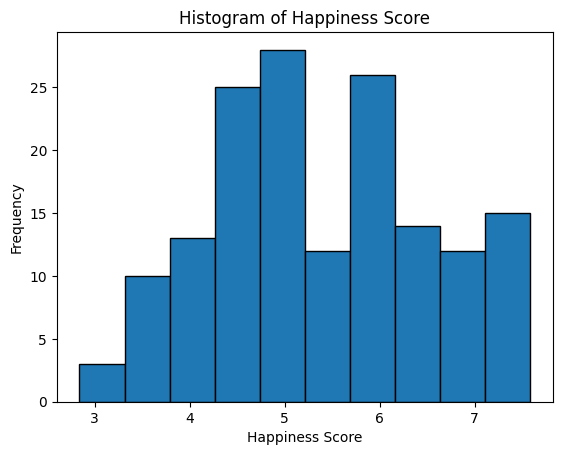

In [31]:
# Visualisasi Histogram Happiness Score
plt.hist(df['Happiness Score'], bins=10, edgecolor='black')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Histogram of Happiness Score')
plt.show()

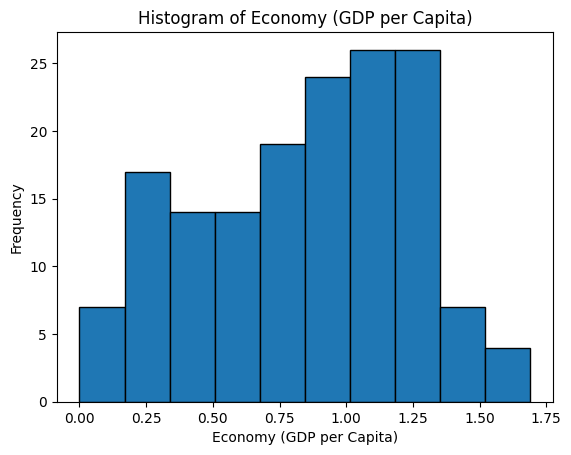

In [32]:
# Visualisasi Histogram Economy (GDP per Capita)
plt.hist(df['Economy (GDP per Capita)'], bins=10, edgecolor='black')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Frequency')
plt.title('Histogram of Economy (GDP per Capita)')
plt.show()


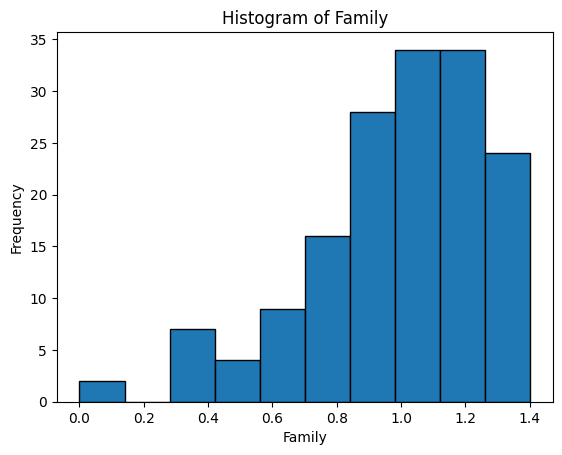

In [33]:
# Visualisasi Histogram Family
plt.hist(df['Family'], bins=10, edgecolor='black')
plt.xlabel('Family')
plt.ylabel('Frequency')
plt.title('Histogram of Family')
plt.show()

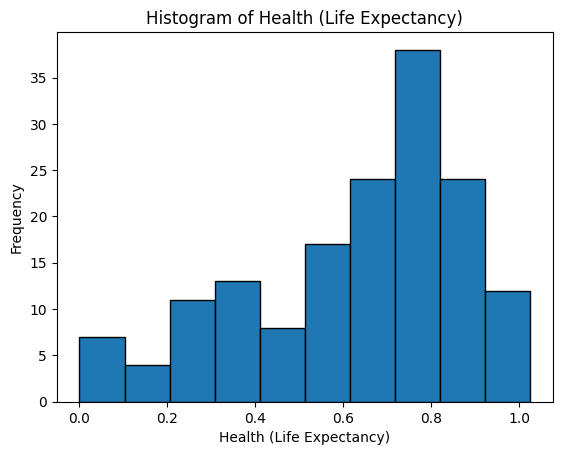

In [34]:
# Visualisasi Histogram Health (Life Expectancy)
plt.hist(df['Health (Life Expectancy)'], bins=10, edgecolor='black')
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Frequency')
plt.title('Histogram of Health (Life Expectancy)')
plt.show()

VISUALISASI MENGGUNAKAN PAIRPLOT

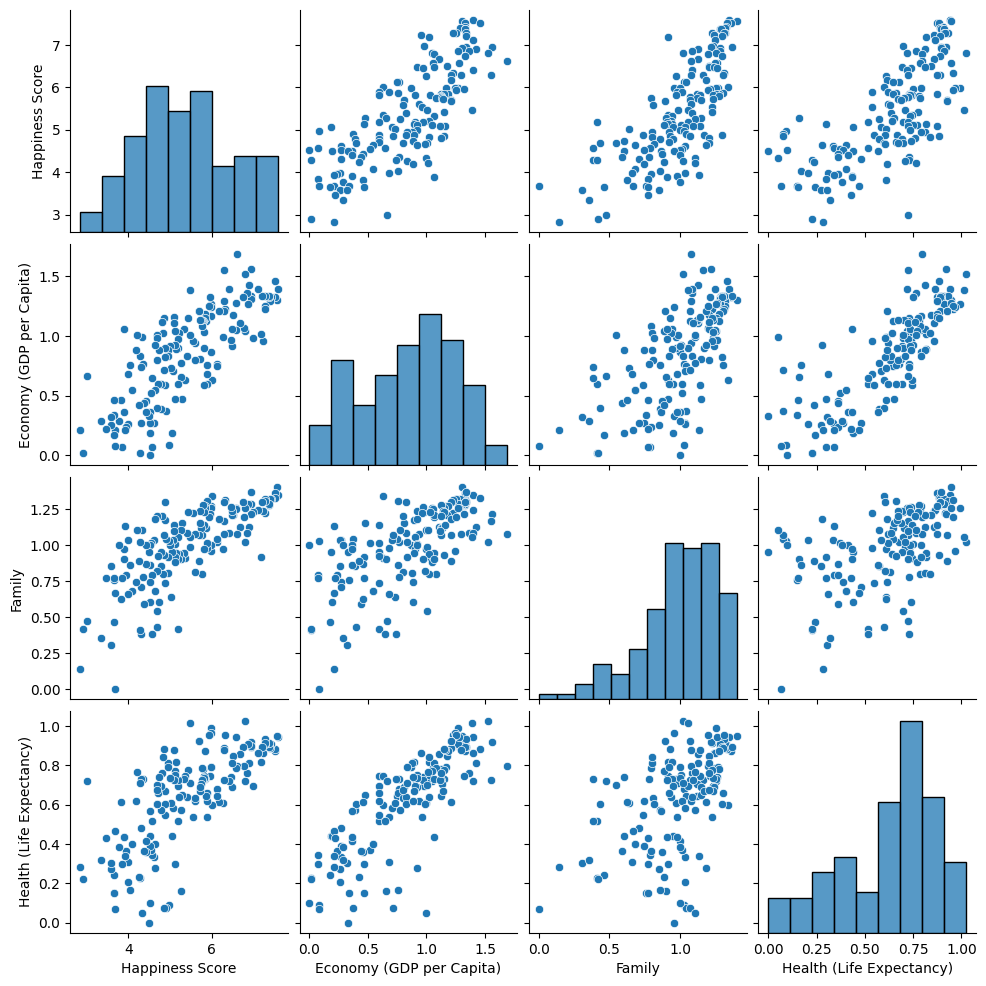

In [35]:
# Plot setiap kolom data
sns.pairplot(df)
plt.show()

VISUALISASI MENGGUNAKAN BOXPLOT YANG DISERTAI DENGAN PERHITUNGAN NILAINYA

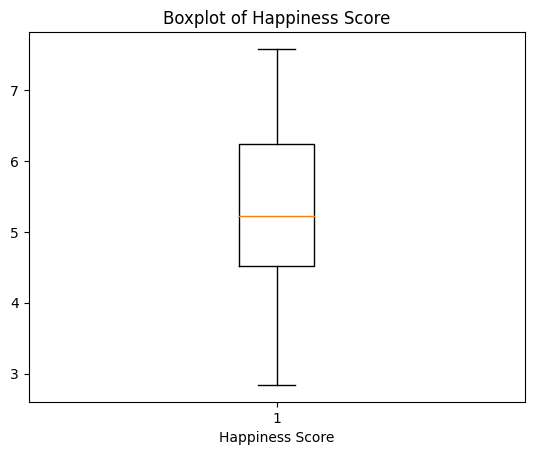

In [36]:
# Visualisasi Boxplot Happiness Score
plt.boxplot(df['Happiness Score'])
plt.xlabel('Happiness Score')
plt.title('Boxplot of Happiness Score')

plt.show()

In [37]:
# Menghitung nilai maksimum (Max) dan minimum (Min)
max_value = df['Happiness Score'].max()
min_value = df['Happiness Score'].min()

# Menghitung kuartil pertama (Q1), kuartil kedua (Q2 atau median), dan kuartil ketiga (Q3)
Q1 = df['Happiness Score'].quantile(0.25)
Q2 = df['Happiness Score'].median()
Q3 = df['Happiness Score'].quantile(0.75)

# Menghitung IQR (Interquartile Range)
IQR = Q3 - Q1

# Menghitung batas bawah (lower whisker) dan batas atas (upper whisker)
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Mendeteksi outliers
outliers = df[(df['Happiness Score'] < lower_whisker) | (df['Happiness Score'] > upper_whisker)]['Happiness Score']

print('Max Value : ', max_value)
print('Min Value : ', min_value)
print('Nilai Q1 : ',Q1)
print('Nilai Q2', Q2)
print('Nilai Q3', Q3)
print('Nilai Interquartile Range', IQR)
print('Nilai Batas Bawah : ', lower_whisker)
print('Nilai Batas Atas', upper_whisker)
print('Outliers : ',outliers)

Max Value :  7.587
Min Value :  2.839
Nilai Q1 :  4.526
Nilai Q2 5.2325
Nilai Q3 6.24375
Nilai Interquartile Range 1.7177500000000006
Nilai Batas Bawah :  1.949374999999999
Nilai Batas Atas 8.820375000000002
Outliers :  Series([], Name: Happiness Score, dtype: float64)


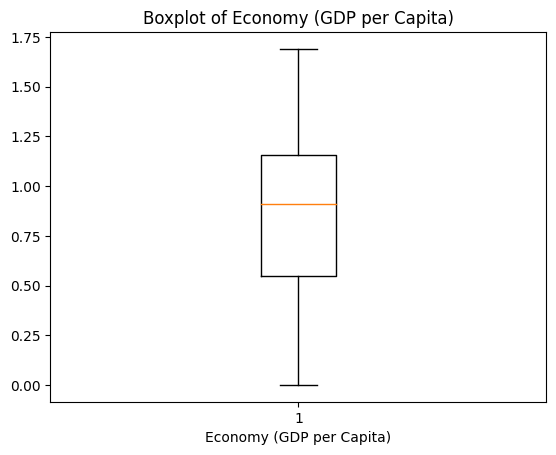

In [38]:
# Visualisasi Boxplot Economy (GDP per Capita)
plt.boxplot(df['Economy (GDP per Capita)'])
plt.xlabel('Economy (GDP per Capita)')
plt.title('Boxplot of Economy (GDP per Capita)')
plt.show()

In [39]:
# Menghitung nilai maksimum (Max) dan minimum (Min)
max_value = df['Economy (GDP per Capita)'].max()
min_value = df['Economy (GDP per Capita)'].min()

# Menghitung kuartil pertama (Q1), kuartil kedua (Q2 atau median), dan kuartil ketiga (Q3)
Q1 = df['Economy (GDP per Capita)'].quantile(0.25)
Q2 = df['Economy (GDP per Capita)'].median()
Q3 = df['Economy (GDP per Capita)'].quantile(0.75)

# Menghitung IQR (Interquartile Range)
IQR = Q3 - Q1

# Menghitung batas bawah (lower whisker) dan batas atas (upper whisker)
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Mendeteksi outliers
outliers = df[(df['Economy (GDP per Capita)'] < lower_whisker) | (df['Economy (GDP per Capita)'] > upper_whisker)]['Economy (GDP per Capita)']

print('Max Value : ', max_value)
print('Min Value : ', min_value)
print('Nilai Q1 : ',Q1)
print('Nilai Q2', Q2)
print('Nilai Q3', Q3)
print('Nilai Interquartile Range', IQR)
print('Nilai Batas Bawah : ', lower_whisker)
print('Nilai Batas Atas', upper_whisker)
print('Outliers : ',outliers)

Max Value :  1.69042
Min Value :  0.0
Nilai Q1 :  0.5458075
Nilai Q2 0.910245
Nilai Q3 1.1584475
Nilai Interquartile Range 0.6126400000000001
Nilai Batas Bawah :  -0.3731525000000001
Nilai Batas Atas 2.0774075
Outliers :  Series([], Name: Economy (GDP per Capita), dtype: float64)


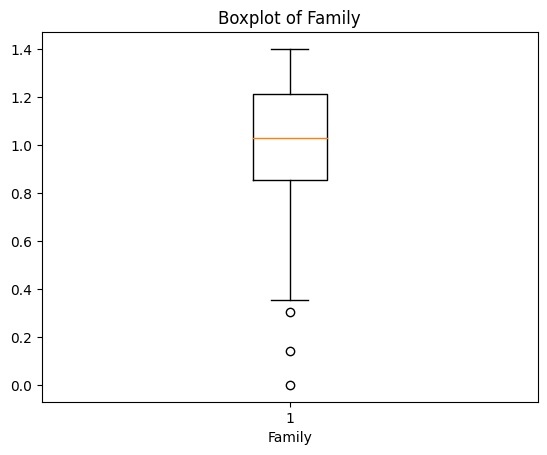

In [40]:
# Visualisasi Boxplot Family
plt.boxplot(df['Family'])
plt.xlabel('Family')
plt.title('Boxplot of Family')
plt.show()

In [41]:
# Menghitung nilai maksimum (Max) dan minimum (Min)
max_value = df['Family'].max()
min_value = df['Family'].min()

# Menghitung kuartil pertama (Q1), kuartil kedua (Q2 atau median), dan kuartil ketiga (Q3)
Q1 = df['Family'].quantile(0.25)
Q2 = df['Family'].median()
Q3 = df['Family'].quantile(0.75)

# Menghitung IQR (Interquartile Range)
IQR = Q3 - Q1

# Menghitung batas bawah (lower whisker) dan batas atas (upper whisker)
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Mendeteksi outliers
outliers = df[(df['Family'] < lower_whisker) | (df['Family'] > upper_whisker)]['Family']

print('Max Value : ', max_value)
print('Min Value : ', min_value)
print('Nilai Q1 : ',Q1)
print('Nilai Q2', Q2)
print('Nilai Q3', Q3)
print('Nilai Interquartile Range', IQR)
print('Nilai Batas Bawah : ', lower_whisker)
print('Nilai Batas Atas', upper_whisker)
print('Outliers : ',outliers)

Max Value :  1.40223
Min Value :  0.0
Nilai Q1 :  0.8568225
Nilai Q2 1.02951
Nilai Q3 1.214405
Nilai Interquartile Range 0.3575824999999999
Nilai Batas Bawah :  0.32044875000000017
Nilai Batas Atas 1.7507787499999998
Outliers :  147    0.00000
152    0.30285
157    0.13995
Name: Family, dtype: float64


/var/folders/wl/0d086x7d1y38q5cqzsm_c9h00000gn/T/ipykernel_46957/1183199880.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Family'] = df['Family'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))


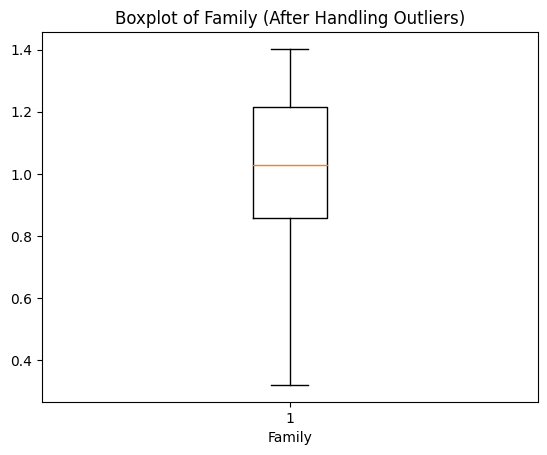

In [42]:
# Menghitung batas bawah dan batas atas berdasarkan IQR
Q1 = df['Family'].quantile(0.25)
Q3 = df['Family'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengganti outlier dengan nilai batas atas atau batas bawah
df['Family'] = df['Family'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Visualisasi Boxplot Family setelah mengatasi outlier
plt.boxplot(df['Family'])
plt.xlabel('Family')
plt.title('Boxplot of Family (After Handling Outliers)')
plt.show()

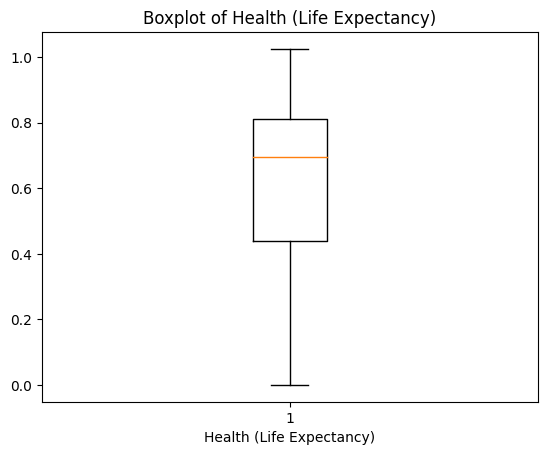

In [43]:
# Visualisasi Boxplot Health (Life Expectancy)
plt.boxplot(df['Health (Life Expectancy)'])
plt.xlabel('Health (Life Expectancy)')
plt.title('Boxplot of Health (Life Expectancy)')
plt.show()

In [44]:
# Menghitung nilai maksimum (Max) dan minimum (Min)
max_value = df['Health (Life Expectancy)'].max()
min_value = df['Health (Life Expectancy)'].min()

# Menghitung kuartil pertama (Q1), kuartil kedua (Q2 atau median), dan kuartil ketiga (Q3)
Q1 = df['Health (Life Expectancy)'].quantile(0.25)
Q2 = df['Health (Life Expectancy)'].median()
Q3 = df['Health (Life Expectancy)'].quantile(0.75)

# Menghitung IQR (Interquartile Range)
IQR = Q3 - Q1

# Menghitung batas bawah (lower whisker) dan batas atas (upper whisker)
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Mendeteksi outliers
outliers = df[(df['Health (Life Expectancy)'] < lower_whisker) | (df['Health (Life Expectancy)'] > upper_whisker)]['Health (Life Expectancy)']

print('Max Value : ', max_value)
print('Min Value : ', min_value)
print('Nilai Q1 : ',Q1)
print('Nilai Q2', Q2)
print('Nilai Q3', Q3)
print('Nilai Interquartile Range', IQR)
print('Nilai Batas Bawah : ', lower_whisker)
print('Nilai Batas Atas', upper_whisker)
print('Outliers : ',outliers)

Max Value :  1.02525
Min Value :  0.0
Nilai Q1 :  0.439185
Nilai Q2 0.6967049999999999
Nilai Q3 0.8110125
Nilai Interquartile Range 0.37182750000000003
Nilai Batas Bawah :  -0.11855625000000009
Nilai Batas Atas 1.3687537500000002
Outliers :  Series([], Name: Health (Life Expectancy), dtype: float64)


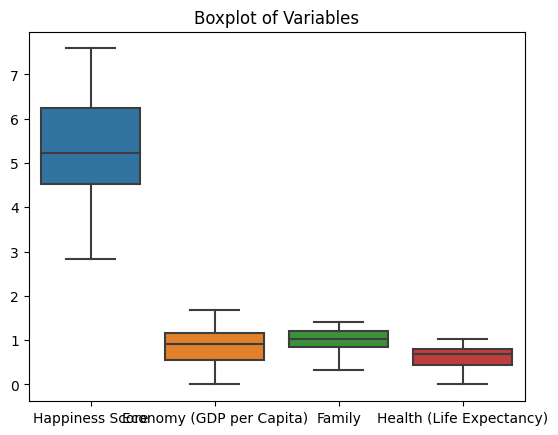

In [45]:
# Visualisasi boxplot
sns.boxplot(data=df)
plt.title('Boxplot of Variables')
plt.show()

VISUALISASI MENGGUNAKAN HEATMAP

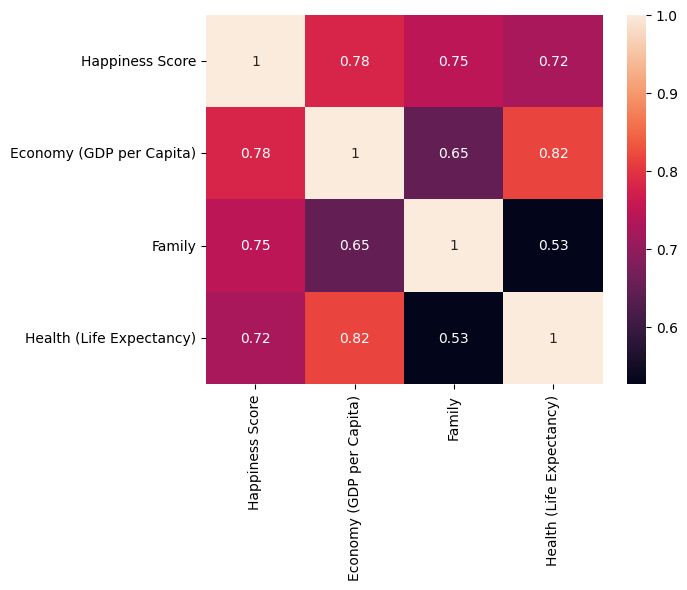

In [46]:
# Analisis Korelasi Antar Kolom Data
correlation_matrix = df[['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

MULTIVARIATE LINEAR REGRESSION

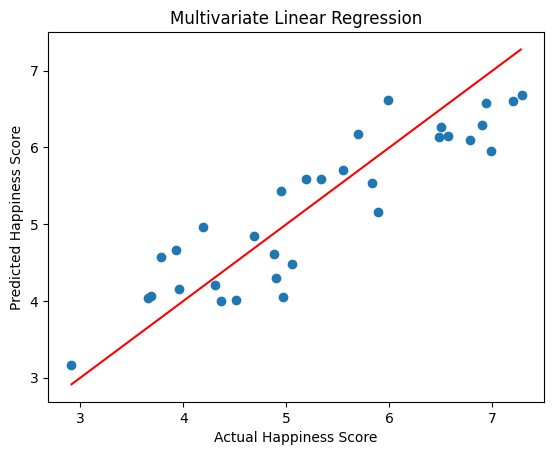

In [47]:
# Analisis Multivariat Linear Regression
X = df[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)']]
y = df['Happiness Score']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Melakukan prediksi menggunakan model pada data uji
y_pred = model.predict(X_test)

# Visualisasi hasil regresi linear
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', solid_capstyle='butt')  # Menambahkan garis regresi linear
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Multivariate Linear Regression')
plt.show()

In [48]:
# Menampilkan koefisien
print("Coefficients:")
print(model.coef_)
print("Intercept:")
print(model.intercept_, '\n')

# Menampilkan metrik evaluasi model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)

Coefficients:
[0.83831776 1.63629554 1.33760745]
Intercept:
2.176560559906363 

Mean Squared Error (MSE): 0.2819010460265108
Mean Absolute Error (MAE): 0.4791115035034599
Root Mean Squared Error (RMSE): 0.5309435431630286
R2 Score: 0.8013033214299774
